In [2]:
import pandas as pd
import sklearn as sk
import os
import csv
import chardet
import re

In [3]:
# Diretórios das pastas com as notícias
real = 'true'
falso = 'fake'

In [4]:
# Função para ler o conteúdo de um arquivo de texto
def ler_arquivo(arquivo):
    with open(arquivo, 'rb') as f:
        # Detecta a codificação do arquivo
        resultado = chardet.detect(f.read())
        # Volta para o início do arquivo
        f.seek(0)
        # Lê o arquivo usando a codificação detectada
        texto = f.read().decode(resultado['encoding'])
        # Remove BOM, espaços duplicados
        texto = texto.lstrip('\ufeff').strip()
        texto = re.sub(r'\s+', ' ', texto)
        return texto


In [5]:
# Função para remover espaços duplicados em uma linha do CSV
def remover_duplos_espacos(texto):
    return re.sub(r'\s+', ' ', texto)

In [6]:
# Lista para armazenar as linhas do CSV
linhas_csv = []

In [7]:
# Função para listar os arquivos em uma pasta e adicionar o texto à lista do CSV
def listar_arquivos(diretorio, categoria):
    for arquivo in os.listdir(diretorio):
        if arquivo.endswith('.txt'):
            texto = ler_arquivo(os.path.join(diretorio, arquivo))
            linhas_csv.append([remover_duplos_espacos(texto), categoria])

In [8]:
# Listar os arquivos da primeira pasta
listar_arquivos(real, 'true')

In [9]:
# Listar os arquivos da segunda pasta
listar_arquivos(falso, 'fake')

In [10]:
# Escrever as linhas no arquivo CSV
with open('noticias.csv', 'w', newline='', encoding='utf-8') as csvfile:
    escritor_csv = csv.writer(csvfile)
    escritor_csv.writerow(['Texto', 'Categoria'])
    for linha in linhas_csv:
        escritor_csv.writerow(linha)

In [11]:
df = pd.read_csv('noticias.csv')

df.head()

,Texto,Categoria
0,O Podemos decidiu expulsar o deputado federal ...,true
1,"Bolsonaro é um liberal completo, diz president...",true
2,Ministro do STF libera Andrea Neves de prisão ...,true
3,"Apesar da abundância, cresce preocupação com p...",true
4,"Por que Harvard e MIT levarão Dilma, Moro e Su...",true


In [12]:
df.shape[0]

7200

In [13]:
df.isnull().sum()

Texto        0
Categoria    0
dtype: int64

In [14]:
# remove campos vazios
# df = df.dropna()

# df.isnull().sum()

In [15]:
df.duplicated().sum()

1

In [16]:
# remove duplicatas
df = df.drop_duplicates()

df.shape[0]

7199

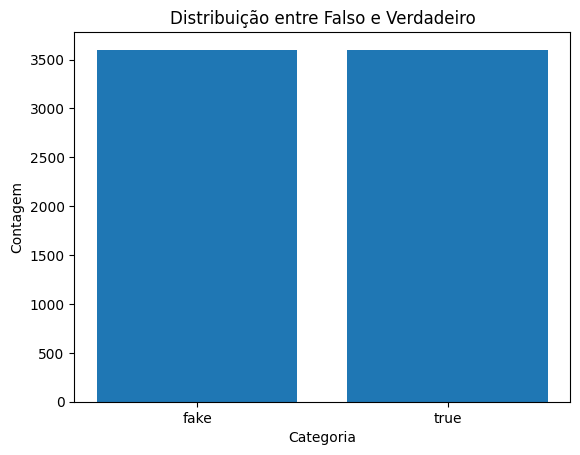

In [17]:
import matplotlib.pyplot as plt

contagem = df['Categoria'].value_counts()

plt.bar(contagem.index, contagem.values)
plt.title('Distribuição entre Falso e Verdadeiro')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

In [18]:
df.to_csv('noticias_pre_processadas.csv', index=False)